<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#From-Scratch" data-toc-modified-id="From-Scratch-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>From Scratch</a></span></li><li><span><a href="#Sklearn" data-toc-modified-id="Sklearn-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Sklearn</a></span></li></ul></div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
%matplotlib inline

### From Scratch

**Euclidean distance**

$d( \mathbf{p},\mathbf{q}) = d( \mathbf{q},\mathbf{p}) =\sqrt{\sum_{n=1}^{n} (q_{i} - p_{i}) ^ 2}$

In [2]:
def euclideanDistance(centroid, datapoint):
    '''
    Description:{
        Calculates the Euclidean distance between a centroid and 
        a data point
    }
    
    inputs: {
        centroid: centroid position
        datapoint: a single datapoint whose distance from
            centroid is to be calculated
    }
    return: {
        [scalar] Distance between centroid and data
    }
    '''
    
    distance = np.sum(np.power(centroid - datapoint, 2))
    return np.sqrt(distance)

In [3]:
# test euclideanDistance

print(euclideanDistance(np.array([1.2, 2.4]), np.array([2.2, 3.4])))

1.4142135623730951


In [4]:
def calculateDistances(data, centroid):
    '''
    Description: {
        This function calculates distances between a 
        centroid and the dataset.
        Uses the euclideanDistance function
    }
    
    inputs: {
        centroid: centroid position
        data: dataset whose distance from a 
            centroid is to be calculated
    }
    
    return: {
        [list] distance of each datapoint from the centroid
    }
    '''
    
    dist = []
    for i in range(len(data)):
        point_dist_to_centroid = euclideanDistance(centroid, data[i])
        dist.append(point_dist_to_centroid)
    return dist

In [5]:
def distanceToCentroids(data, centroids):
    '''
    Description: {
        This function calculates distance of between all datapoints
        and the specified number of centroids.
        Uses calculateDistances function
    }
    
    inputs: {
        data: dataset
        centroids: list of list of initial or intermediary 
            centroids positions.
    }
    
    return: {
        [list of list] each row contains distance between the 
            datapoint and all centroids
    }
    '''

    data_dist_from_centroid = [[] for i in range(len(data))]

    for k in centroids:
        dist = calculateDistances(data, k)
        for x, y in enumerate(dist):
            data_dist_from_centroid[x].append(y)

    return data_dist_from_centroid

In [6]:
def getNewCentroid(data, distances, numOfCentroids, assigned_centroids=None):
    '''
    Description: {
        This functions assigns datapoints to each of
            the centroids and calculates new position for 
            all the centroids
    }
    
    inputs: {
        data: dataset
        distances: calculated distances between datapoints and centroids
        numOfCentroids: number of centroids initialized
    }
    
    return: {
        [list of list] new poistions of each centroid
    }
    '''
    
    
    assigned_centroids = [[] for _ in range(numOfCentroids)]

    # assignnig data point to centroids
    for i in range(data.shape[0]):
        min_index = np.argmin(distances[i])
        assigned_centroids[min_index].append(data[i])

    new_k = [np.array(i).mean(axis=0) for i in assigned_centroids]

    return new_k, assigned_centroids

In [7]:
# generating dataset

X = -2 * np.random.rand(100,2)
X1 = 1 + 2 * np.random.rand(50,2)
X[50:100, :] = X1
print(X.shape)

(100, 2)


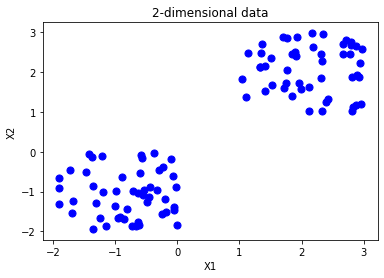

In [8]:
plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = "b")
plt.title("2-dimensional data")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [9]:
num_centroids = int(input("Number of centroids: "))
centroids = []

# Initial centroids
num_dim = X.shape[1]

# dynamic 
for i in range(num_centroids):
    k = [np.random.choice(X[:, z] + 1 * 2* np.random.rand(X.shape[0])) for z in range(num_dim)]
    centroids.append(k)

print(centroids)

Number of centroids: 2
[[2.4215534228554363, 2.5730882014004743], [3.7702273469854988, 0.37696055464926514]]


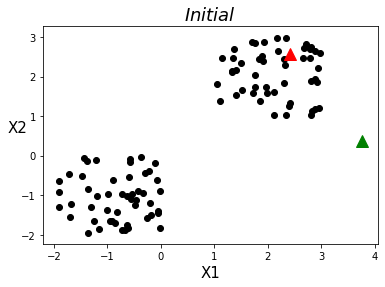

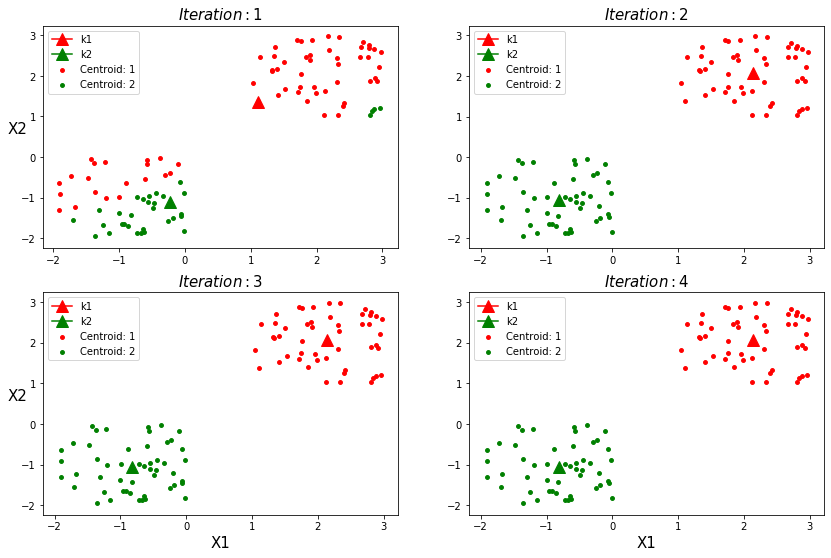

In [10]:
num_iterations = 4

# centroids = np.array([[-2, 3],
#                       [3, -2]])

colors = ["red", "green"]

for idx, centroid in enumerate(centroids, 1):
    plt.plot(centroid[0], centroid[1], marker="^", c=colors[idx - 1], markersize=12, label=f'k{idx}')

    
plt.scatter(X[:, 0], X[:, 1], c="k")

plt.title("$Initial$", fontsize=18)
plt.xlabel("X1", fontsize=15)
plt.ylabel("X2", fontsize=15, rotation=0)
plt.show()


distances = distanceToCentroids(X, centroids)
centroids, centroid_points = getNewCentroid(X, distances, num_centroids)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 9))

for i in range(num_iterations):
    plt.sca(axes[i // 2, i % 2])
  
    for idx, centroid in enumerate(centroids, 1):
        x1, x2 = [], []
        
        for a, b in centroid_points[idx - 1]:
            x1.append(a)
            x2.append(b)
            
        plt.plot(centroid[0], centroid[1], marker="^", c=colors[idx - 1], markersize=12, label=f'k{idx}')
        plt.scatter(x1, x2, s=15, c=colors[idx - 1], label=f'Centroid: {idx}')
        
        plt.title(f"$Iteration: {i + 1}$", fontsize=15)
        
        if i in (0, 1):
            plt.xlabel("")
        else:
            plt.xlabel("X1", fontsize=15)
        
        if i in (1, 3):
            plt.ylabel("")
        else:
            plt.ylabel("X2", fontsize=15, rotation=0)
    
    plt.legend()
    
    distances = distanceToCentroids(X, centroids)
    centroids, centroid_points = getNewCentroid(X, distances, num_centroids)

In [11]:
# assigning a cluster to a random point


def predict(point, centroids):
    distances = [euclideanDistance(i, point) for i in centroids]
    assigned_centroid = np.argmin(distances)
    print(f"Datapoint: {round(point[0], 2), round(point[1], 2)} is assigned to centroid: {assigned_centroid + 1}")

array = np.arange(-2.0, 3.0, .35, dtype=float)
point = [np.random.choice(array) for i in range(num_dim)]
predict(point, centroids)

Datapoint: (1.5, -2.0) is assigned to centroid: 2


### Sklearn

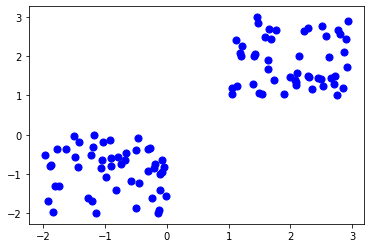

In [12]:
X = -2 * np.random.rand(100,2)
X1 = 1 + 2 * np.random.rand(50,2)
X[50:100, :] = X1
plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = 'b')

In [13]:
from sklearn.cluster import KMeans


Kmean = KMeans(n_clusters=2)
Kmean.fit(X)

centroids = Kmean.cluster_centers_
print(centroids)
print(Kmean.n_iter_)

[[-0.89852006 -0.89421717]
 [ 2.03482699  1.84963415]]
2


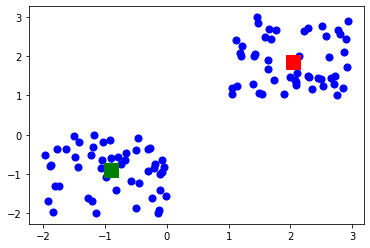

In [14]:
plt.scatter(X[ : , 0], X[ : , 1], s =50, c='b')
plt.scatter(centroids[0][0], centroids[0][1], s=200, c='g', marker='s')
plt.scatter(centroids[1][0], centroids[1][1], s=200, c='r', marker='s')